In [56]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [57]:
mylist=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','sal']

In [58]:
train=pd.read_csv('adult.data', header=None, names=mylist)

In [59]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [60]:
print(train.columns.values)

['age' 'workclass' 'fnlwgt' 'education' 'education-num' 'marital-status'
 'occupation' 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' 'sal']


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
sal               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [62]:
train = train.drop(['fnlwgt'], axis=1)

In [63]:
train.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
sal               0
dtype: int64

In [64]:

train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [65]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['workclass']= label_enc.fit_transform(train['workclass'])
train.head()


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal
0,39,7,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [66]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['education']= label_enc.fit_transform(train['education'])
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal
0,39,7,9,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [67]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['education-num']= label_enc.fit_transform(train['education-num'])
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal
0,39,7,9,12,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,9,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,11,8,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,1,6,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,9,12,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [68]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['marital-status']= label_enc.fit_transform(train['marital-status'])
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal
0,39,7,9,12,4,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,9,12,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,11,8,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,1,6,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,9,12,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [69]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['occupation']= label_enc.fit_transform(train['occupation'])
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal
0,39,7,9,12,4,1,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,9,12,2,4,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,11,8,0,6,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,1,6,2,6,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,9,12,2,10,Wife,Black,Female,0,0,40,Cuba,<=50K


In [70]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['relationship']= label_enc.fit_transform(train['relationship'])
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal
0,39,7,9,12,4,1,1,White,Male,2174,0,40,United-States,<=50K
1,50,6,9,12,2,4,0,White,Male,0,0,13,United-States,<=50K
2,38,4,11,8,0,6,1,White,Male,0,0,40,United-States,<=50K
3,53,4,1,6,2,6,0,Black,Male,0,0,40,United-States,<=50K
4,28,4,9,12,2,10,5,Black,Female,0,0,40,Cuba,<=50K


In [71]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train["race"]= label_enc.fit_transform(train['race'])
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal
0,39,7,9,12,4,1,1,4,Male,2174,0,40,United-States,<=50K
1,50,6,9,12,2,4,0,4,Male,0,0,13,United-States,<=50K
2,38,4,11,8,0,6,1,4,Male,0,0,40,United-States,<=50K
3,53,4,1,6,2,6,0,2,Male,0,0,40,United-States,<=50K
4,28,4,9,12,2,10,5,2,Female,0,0,40,Cuba,<=50K


In [72]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['sex']= label_enc.fit_transform(train['sex'])
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal
0,39,7,9,12,4,1,1,4,1,2174,0,40,United-States,<=50K
1,50,6,9,12,2,4,0,4,1,0,0,13,United-States,<=50K
2,38,4,11,8,0,6,1,4,1,0,0,40,United-States,<=50K
3,53,4,1,6,2,6,0,2,1,0,0,40,United-States,<=50K
4,28,4,9,12,2,10,5,2,0,0,0,40,Cuba,<=50K


In [73]:
from sklearn.preprocessing import LabelEncoder
label_enc  = LabelEncoder()
train['native-country']= label_enc.fit_transform(train['native-country'])
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal
0,39,7,9,12,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,9,12,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,11,8,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,1,6,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,9,12,2,10,5,2,0,0,0,40,5,<=50K


In [74]:
X = train.drop('sal', axis=1)
Y = train['sal']

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22792, 13)
(22792,)
(9769, 13)
(9769,)


In [76]:
logreg = LogisticRegression()

In [78]:
logreg.fit(X_train,Y_train)

C:\Users\Ashutosh Mahajan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
Y_pred = logreg.predict(X_test)

In [80]:
print(Y_pred)

[' >50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [81]:
scoreLR = accuracy_score(Y_test,Y_pred)

In [82]:
print("Score ="+str(scoreLR*100)+"%")

Score =82.72085167366157%


In [83]:
svc= SVC()
svc.fit(X_train,Y_train)
Y_pred= svc.predict(X_test)

scoreSVC = accuracy_score(Y_test,Y_pred)
print("Accuracy Score : "+str(scoreLR*100)+"%")

C:\Users\Ashutosh Mahajan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score : 82.72085167366157%


In [84]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

scoreKNN = accuracy_score(Y_test, Y_pred)
print("Accuracy score: " + str(scoreKNN * 100) + "%")

Accuracy score: 83.16101955164295%


In [85]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)

scoreGNB = accuracy_score(Y_test, Y_pred)
print("Accuracy score: " + str(scoreGNB * 100) + "%")

Accuracy score: 80.46882997236156%


In [86]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

scoreSGD = accuracy_score(Y_test, Y_pred)
print("Accuracy score: " + str(scoreSGD * 100) + "%")

Accuracy score: 78.8821783191729%


In [87]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

scoreDT = accuracy_score(Y_test, Y_pred)
print("Accuracy score: " + str(scoreDT * 100) + "%")

Accuracy score: 81.11372709591565%


In [88]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

scoreRF = accuracy_score(Y_test, Y_pred)
print("Accuracy score: " + str(scoreRF * 100) + "%")

Accuracy score: 84.97287337496161%


In [89]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [scoreSVC, scoreKNN, scoreLR, 
              scoreRF, scoreGNB, scoreSGD, scoreDT]})


models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.849729
1,KNN,0.831610
2,Logistic Regression,0.827209
6,Decision Tree,0.811137
0,Support Vector Machines,0.807350
4,Naive Bayes,0.804688
5,Stochastic Gradient Decent,0.788822


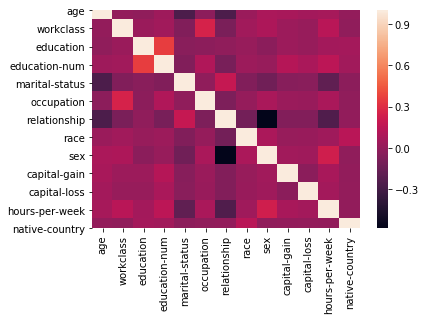

In [90]:
sns.heatmap(train.corr())